# Recall duration for different training times

This notebook is to have a reference for how long the patterns will be recalled for differen training timies

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '1e99cfe7b1982691a0212334a93d58057df83d56'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [6]:
from network import BCPNN, NetworkManager, BCPNNFast, Protocol
from analysis_functions import calculate_recall_success, calculate_timings

## Recall duration

In [11]:
# Network parameters
minicolumns = 40
hypercolums = 4
number_of_patterns = 10
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time_ranges = np.arange(0.020, 0.400, 0.020)

epochs = 3
mean_recall_duration = []
std_recall_duration = []

In [14]:
for training_time in training_time_ranges:
    # Build the network, manager and protocol
    nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    simple_protocol = Protocol()
    simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time,
                                    inter_sequence_interval=0, epochs=epochs)

    # Train
    manager.run_network_protocol(protocol=simple_protocol, verbose=False)
    T_cue= training_time
    I_cue = 0
    T_recall = len(patterns_indexes) * 15 * training_time

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
    timings = calculate_timings(manager=manager, remove=0.010)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_duration.append(np.mean(timings))
    std_recall_duration.append(np.std(timings))

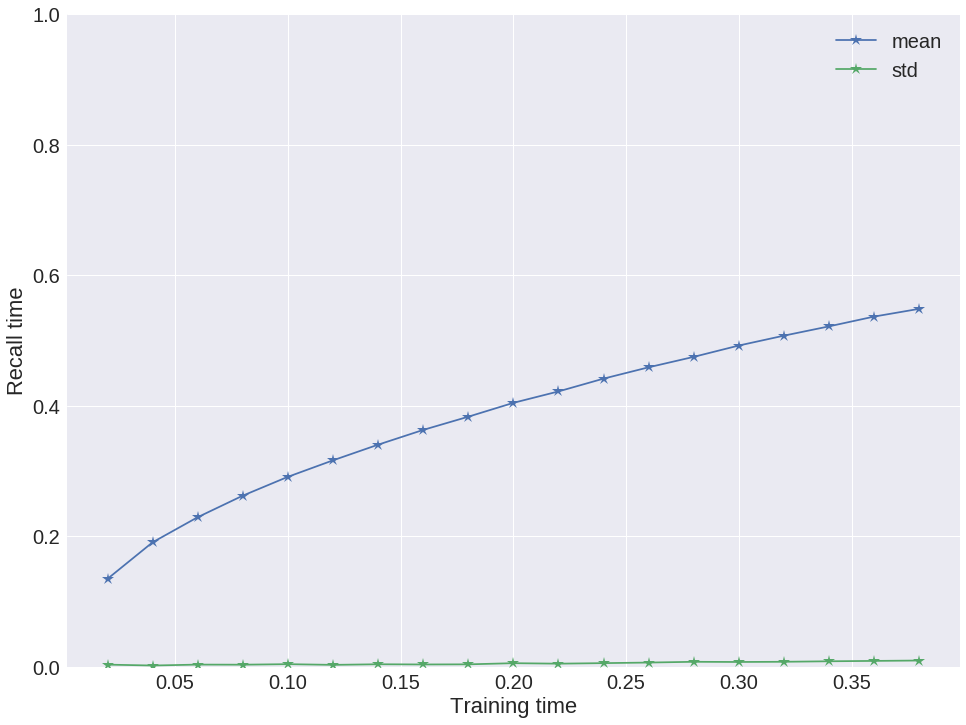

In [21]:
import seaborn as sns
sns.set(font_scale=2.0)
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(training_time_ranges, mean_recall_duration, '*-', markersize=13, label='mean')
ax.plot(training_time_ranges, std_recall_duration, '*-', markersize=13, label='std')

ax.set_xlabel('Training time')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 1.0])
ax.legend()

## Training success for different times

In [22]:
# Network parameters
minicolumns = 40
hypercolums = 4
number_of_patterns = 10
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time_ranges = np.arange(0.020, 0.400, 0.020)

epochs = 3
successes = []

In [23]:
for training_time in training_time_ranges:
    # Build the network, manager and protocol
    nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    simple_protocol = Protocol()
    simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time,
                                    inter_sequence_interval=0, epochs=epochs)

    # Train
    manager.run_network_protocol(protocol=simple_protocol, verbose=False)
    T_cue= training_time
    I_cue = 0
    T_recall = len(patterns_indexes) * 15 * training_time
    # Success
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=I_cue,
                                       T_cue=T_cue, n=10, patterns_indexes=patterns_indexes)
    successes.append(success)

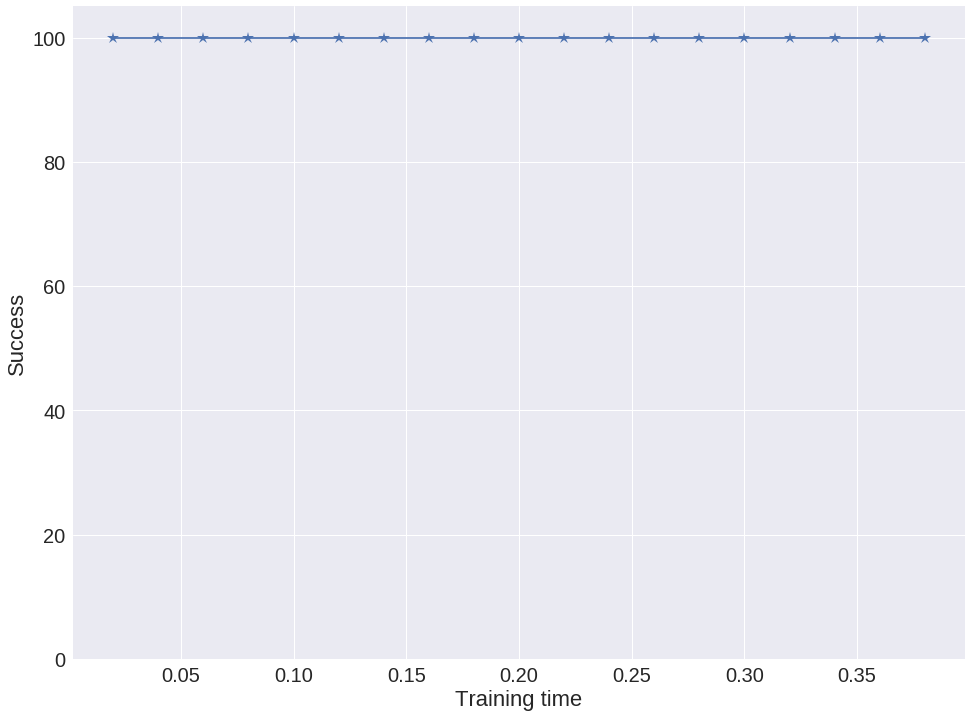

In [25]:
import seaborn as sns
sns.set(font_scale=2.0)
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(training_time_ranges, successes, '*-', markersize=13)

ax.set_xlabel('Training time')
ax.set_ylabel('Success')
ax.set_ylim([0, 105])
ax.legend()

#### Git reload

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])